<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE03_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example
x_1 = np.array((3, 5))
x_2 = np.array((1, 7))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

2.8284271247461903


In [4]:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

2.8284271247461903


In [5]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

2.8284271247461903


In [6]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [7]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

4


In [10]:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

4


In [11]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [12]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [14]:
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  2.5198420997897464


In [15]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  4.0
Minkowski distance when p=2 is  2.8284271247461903


In [19]:
str_1 = 'research'
str_2 = 'arikatla'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

7.0


In [20]:
from numpy.linalg import norm
cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9216353751380653
0.9216353751380653


In [21]:
chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

2


In [22]:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [23]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['cake', 'mate', 'bake']
list2 = ['dog', 'mate', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.16666666666666666
Jaccard distance is : 0.8333333333333334


In [24]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

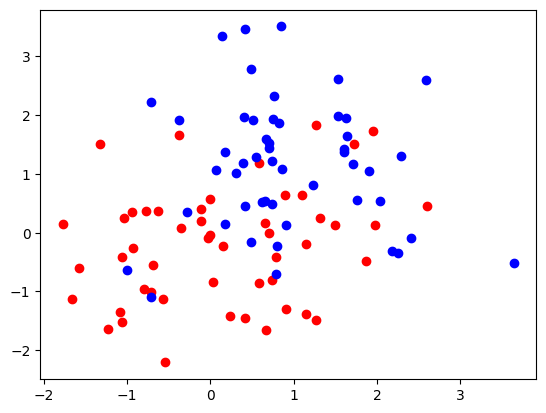

In [25]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

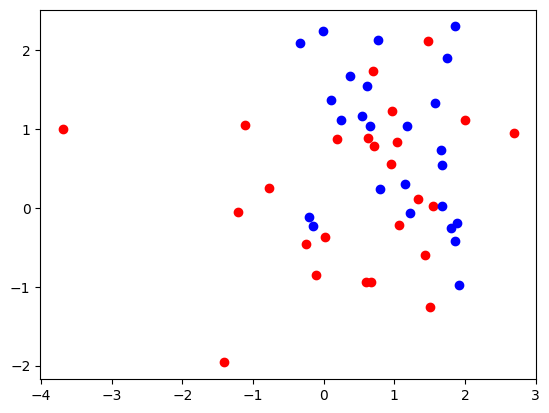

In [26]:
n = 25
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
60.0


In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [29]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [30]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [31]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [32]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [33]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [34]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



**How are similarity and distance different from each other?**

Similarity measures how alike or related two objects, data points, or sets are to each other.

Distance measures how much far apart two objects, data points, or sets are from each other.

As the similarity between objects increases, the distance between them decreases, and vice versa.


**Are there any conditions for a particular distance to be considered a "distance metric"?**

Yes, there are specific conditions that a function must satisfy to be considered a "distance metric":

Symmetry: The distance from point x to point y is the same as the distance from point y to point x:
d(x, y) = d(y, x) for all x and y.

Triangle inequality: The distance from point x to point y is always less than or equal to the sum of the distances from x to some other point z and from z to y, for any third point z in the space:
d(x, y) ≤ d(x, z) + d(z, y) for all x, y, and z.

Non-negativity: For all pairs of points x and y in the space, the distance should always be non-negative:
d(x, y) ≥ 0.





